In [1]:
%matplotlib inline
import csv
import numpy as np
from sklearn.neighbors import KNeighborsRegressor
from sklearn import preprocessing
from sklearn.metrics.pairwise import euclidean_distances
import matplotlib.pyplot as plt
from numpy import genfromtxt

In [2]:
def load_csv_file(in_file, header=None, delimiter=","):
    csv = genfromtxt(in_file, delimiter=delimiter)
    return csv


In [3]:
def c_index(true_labels, predictions):
    """
    Calculate C-index
    """
    n = 0
    h_sum = 0
    for i in range(0, len(true_labels)):
        t = true_labels[i]
        p = predictions[i]
        for j in range(i+1, len(true_labels)):
            nt = true_labels[j]
            np = predictions[j]
            if t != nt:
                n += 1
                if (p < np and t < nt) or (p > np and t > nt):
                    h_sum += 1.0
                elif (p < np and t > nt) or (p > np and t < nt):
                    h_sum += 0
                elif p == np:
                    h_sum += 0.5
    return h_sum/float(n)

In [4]:
def spatial_leave_one_out(X, Y, i, radius, coor_dist):
    """
    split data into train, test set
    remove the data from dead zone specified by radius
    """
    X_train = X
    y_train = Y
    delete_row = []
    
    for j in range(0, coor_dist.shape[0], 1):
        if coor_dist[i:i+1, j:j+1][0] <= radius:
            delete_row.append(j)
    delete_row.sort(reverse=True) 
    for k in delete_row:
        X_train = np.delete(X_train, (k), axis=0)
        y_train = np.delete(y_train, (k), axis=0)
    X_test = X[i:i+1,:]
    y_test = Y[i:i+1]
    
    return X_train, y_train, X_test, y_test

In [5]:
def coordinates_distance(coordinates):
    """
    calculate the euclidean distance among all input data
    return symmetric matrix
    """
    return euclidean_distances(coordinates, coordinates)

In [6]:
def cross_validation(n_neighbor, X, y, coor_dist, radius):
    """
    run leave-one-out cross-vaidation experiments with 
    the given neighbours
    """
    cv_scores = []
    all_predict = np.array([])
    all_test = np.array([])
    for i in range(0, len(X), 1):
        X_train, y_train, X_test, y_test = spatial_leave_one_out(X, y, i, radius, coor_dist)
        normalizer = preprocessing.StandardScaler().fit(X_train)
        X_train_scaled = normalizer.transform(X_train)
        X_test_scaled = normalizer.transform(X_test)
        # print "scaled data mean", X_train_scaled.mean(axis=0)
        # print "scaled data std", X_train_scaled.std(axis=0)
        knn = KNeighborsRegressor(n_neighbors=n_neighbor)
        knn.fit(X_train_scaled, y_train)
        y_predict = knn.predict(X_test_scaled)
        all_predict = np.concatenate([all_predict, y_predict])
        all_test = np.concatenate([all_test, y_test])
        # scores = c_index(y_test, y_predict)
        # print "c-index for {} folds".format(str(n_groups))
        # print scores
        # cv_scores.append(scores)
    cv_scores = c_index(all_test, all_predict)
    return np.mean(cv_scores)


  

In [1]:
def main_function(x_data_file, y_data_file, coor_file,  max_radius):
    """
    varying the radius ranging from 0 to 200 
    save C-index for each radius in dictionary for plotting graph 
    """
    radius_optimal_CI=dict() #this dictionary will store c index of each radius corresponding to optimal k
    
    coordinates = load_csv_file(coor_file)
    coor_dist = coordinates_distance(coordinates)
    
    

    X = load_csv_file(x_data_file)
    Y = load_csv_file(y_data_file)
    print ("sample input data\n", X[:, 0:10])
    print ("sample output data\n", Y[0:10])
    print ("original X data dimension", X.shape)
    print ("original Y data dimension", Y.shape)
    for radius in range(0, max_radius+10, 10):
        optimal_k=0 #Stores the optimal k 
        highest_CI=0 #stores the c index value corresponding to optimal k
        #print('runing....')
        for k in range(1,10,2):
            total_score = cross_validation(k, X, Y, coor_dist, radius)

            if total_score>highest_CI:# we are getting here the c index with highest value
                highest_CI=total_score
                optimal_k=k#The k corresponding to highest C index is the optimal k. 
        radius_optimal_CI[radius]=(optimal_k,highest_CI)# In the dictionary we store, for each radius, the optimal k and the corresponding c index       
        
        print ("radius:", radius, "C-index:", highest_CI)

        
    return radius_optimal_CI


In [ ]:
x_data_file = 'INPUT.csv'
y_data_file='OUTPUT.csv'
coor_file='COORDINATES.csv'
#max_radius=200
X = load_csv_file(x_data_file)
Y = load_csv_file(y_data_file)
coordinates = load_csv_file(coor_file)
coor_dist = coordinates_distance(coordinates)
normalize = preprocessing.StandardScaler().fit(X)
X = normalize.transform(X)



In [ ]:
main_function(x_data_file, y_data_file, coor_file,  200)

In [9]:
print ('The optimum and highest C index corresponding to that is :',C_score)

The optimum and highest C index corresponding to that is : {0: (9, 0.7212898398357059), 10: (9, 0.7124014284734345), 20: (7, 0.7113787904452991), 30: (9, 0.7059586689046644), 40: (7, 0.7033439773549723), 50: (9, 0.6997472453169338), 60: (9, 0.697312092887171), 70: (9, 0.6922297008801267), 80: (9, 0.6898095975383892), 90: (7, 0.6885325249289893), 100: (7, 0.6857144957015605), 110: (7, 0.6515901636360837), 120: (7, 0.6347432345599857), 130: (7, 0.6260641105149028), 140: (7, 0.6236450571095392), 150: (7, 0.6208721751461861), 160: (7, 0.6221719963770196), 170: (7, 0.622190895231749), 180: (7, 0.6213397468113432), 190: (7, 0.621237553004288), 200: (7, 0.6191219312109686)}


In [10]:
# X = [[0, 1], [1, 1], [1, 2]]
# euclidean_distances(X, X)

In [11]:
radius=[] #stores the radius
cindex_optk=[] #stores the c index corresponding to optimum k
for key, value in C_score.items():
    cindex_optk.append((C_score[key][1]))
    radius.append(key)


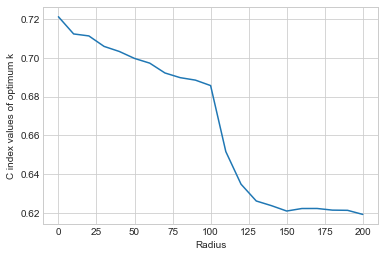

In [12]:
%matplotlib inline


import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np
plt.xlabel('Radius')
plt.ylabel('C index values of optimum k')
plt.plot(radius,cindex_optk);

Discussion:
I have done some modifications on my previous work. Now i have a dictionary which stores the c index of various the optimum k. Here leave spatial out cross validation (modified form of Leave one out) has been performed by skipping the data points in a particular radius. As the radius increases, the c index decreases. 

By implementing spatial LOO CV, becasue higher accuracy is not always the best performance metric when the data which lie together are very idendical. 